In [ ]:
# !pip install textstat

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif, mutual_info_classif
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize, pos_tag
import spacy
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
from textblob import TextBlob
# import textstat
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

In [ ]:
train_df = pd.read_csv("/kaggle/input/pan-dataset/train.csv").sample(2000)
test_df = pd.read_csv("/kaggle/input/pan-dataset/val.csv").sample(700)

In [ ]:
# X_train = train_df["text"]
y_train = train_df["label"]
# X_test = test_df["text"]
y_test = test_df["label"]

In [ ]:
def extract_pos_ngrams(text, ngram_range=(3, 5)):
    tokens = word_tokenize(text)
    pos_tags = [tag for _, tag in pos_tag(tokens)]

    all_ngrams = []
    for n in range(ngram_range[0], ngram_range[1] + 1):
        ngrams = list(nltk.ngrams(pos_tags, n))
        all_ngrams.extend(["_".join(ngram) for ngram in ngrams])

    return " ".join(all_ngrams)

In [ ]:
train_df["pos_ngrams"] = train_df["text"].apply(lambda x: extract_pos_ngrams(x))
test_df["pos_ngrams"] = test_df["text"].apply(lambda x: extract_pos_ngrams(x))

In [ ]:
vectorizer = CountVectorizer()  # Change to TfidfVectorizer() for TF-IDF
X_train = vectorizer.fit_transform(train_df["pos_ngrams"])
X_test = vectorizer.transform(test_df["pos_ngrams"])

In [ ]:
# df_test_features = pd.DataFrame()
# df_test_features[feature_columns] = test_df['text'].apply(extract_features).apply(pd.Series)
# X_test = np.hstack((X_test_vec, df_test_features))

In [ ]:
# feature_columns = [
#     "punctuation_count",
#     "word_count",
#     "sentence_count",
#     "verb_count",
#     "char_count",
#     "adv_count",
#     "hapax_legomena",
#     "noun_count",
#     "flesch_reading_ease",
#     "personal_pronoun_count",
#     "avg_sentence_length",
#     "flesch_grade_level"
# ]

In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=47)
svm_model = SVC(probability=True)
nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=47)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
models = {
    'XGBoost': xgb_model,
    'SVM': svm_model,
    # 'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'GradientBoosting': gbc
}

Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       237
           1       0.93      0.95      0.94       463

    accuracy                           0.93       700
   macro avg       0.92      0.91      0.92       700
weighted avg       0.93      0.93      0.93       700



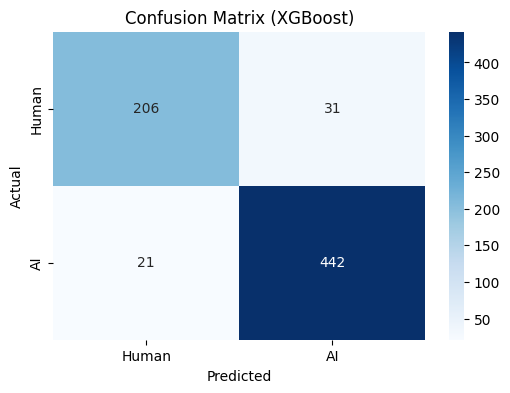

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       237
           1       0.91      0.96      0.93       463

    accuracy                           0.91       700
   macro avg       0.91      0.89      0.90       700
weighted avg       0.91      0.91      0.91       700



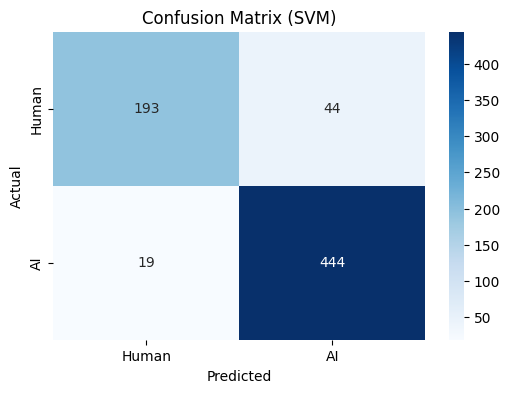

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       237
           1       0.89      0.98      0.93       463

    accuracy                           0.91       700
   macro avg       0.92      0.87      0.89       700
weighted avg       0.91      0.91      0.91       700



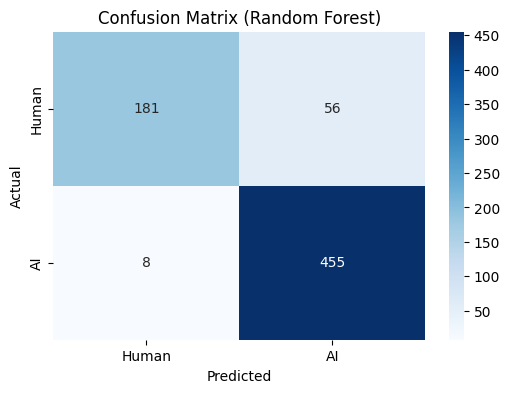

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       237
           1       0.92      0.96      0.94       463

    accuracy                           0.92       700
   macro avg       0.92      0.90      0.91       700
weighted avg       0.92      0.92      0.92       700



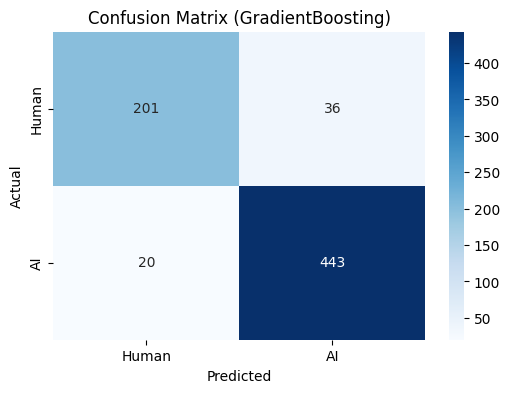

In [ ]:
results = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    # y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Evaluation of model {model_name}")
    # roc_auc = roc_auc_score(y_test, y_proba)
    # print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

In [ ]:
coling_df = pd.read_csv("/kaggle/input/train-coling/train_COLING.csv").sample(700)

In [ ]:
coling_df["pos_ngrams"] = coling_df["text"].apply(lambda x: extract_pos_ngrams(x))

In [ ]:
X = coling_df["pos_ngrams"]
y = coling_df["label"]
X_Coling = vectorizer.transform(X).toarray()

In [ ]:
# df_coling_features = pd.DataFrame()
# df_coling_features = coling_df['text'].apply(extract_features).apply(pd.Series)
# X_Coling = np.hstack((x_vec, df_coling_features))

Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       265
           1       0.50      0.00      0.00       435

    accuracy                           0.38       700
   macro avg       0.44      0.50      0.28       700
weighted avg       0.45      0.38      0.21       700



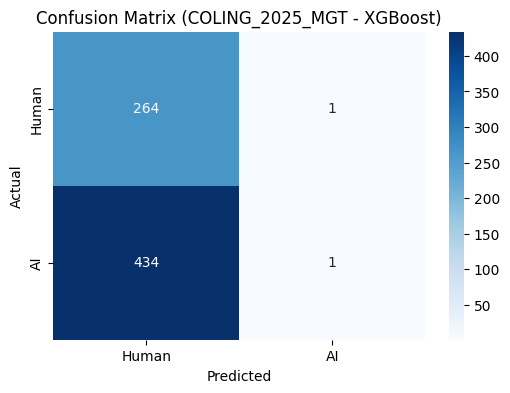

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.38      0.09      0.15       265
           1       0.62      0.91      0.74       435

    accuracy                           0.60       700
   macro avg       0.50      0.50      0.44       700
weighted avg       0.53      0.60      0.51       700



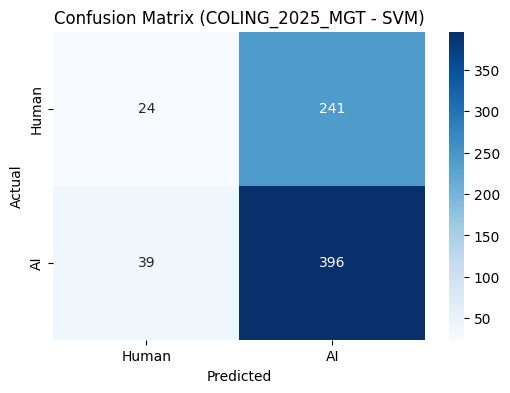

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.50      0.05      0.10       265
           1       0.63      0.97      0.76       435

    accuracy                           0.62       700
   macro avg       0.56      0.51      0.43       700
weighted avg       0.58      0.62      0.51       700



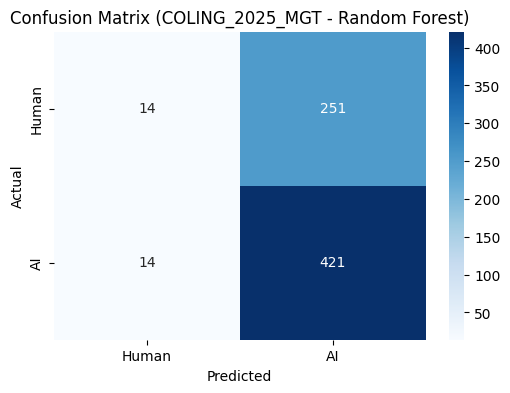

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.45      0.12      0.19       265
           1       0.63      0.91      0.74       435

    accuracy                           0.61       700
   macro avg       0.54      0.52      0.47       700
weighted avg       0.56      0.61      0.53       700



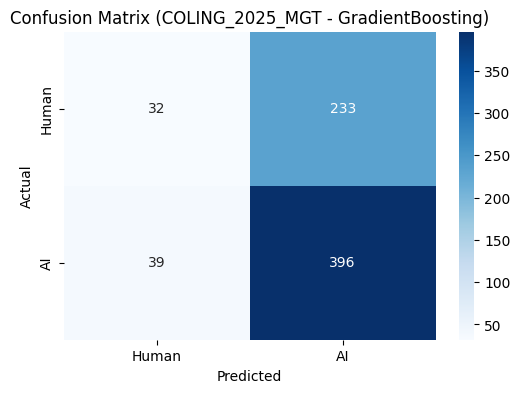

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_Coling)
    # y_proba = model.predict_proba(X_Coling)[:, 1]

    print(f"Evaluation of model {model_name}")
    # roc_auc = roc_auc_score(y, y_proba)
    # print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (COLING_2025_MGT - {model_name})')
    plt.show()

In [ ]:
pan_df = pd.read_csv("/kaggle/input/pan-dataset/val.csv").sample(700)
pan_df["pos_ngrams"] = pan_df["text"].apply(lambda x: extract_pos_ngrams(x))

In [ ]:
X = pan_df["pos_ngrams"]
y = pan_df["label"]
X_pan = vectorizer.transform(X).toarray()

Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.40      0.98      0.57       280
           1       0.58      0.02      0.03       420

    accuracy                           0.40       700
   macro avg       0.49      0.50      0.30       700
weighted avg       0.51      0.40      0.25       700



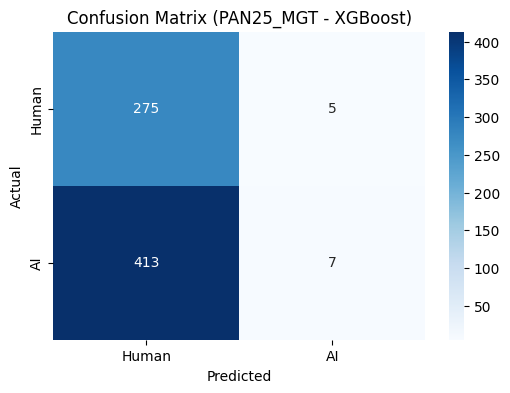

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       280
           1       0.89      0.98      0.93       420

    accuracy                           0.91       700
   macro avg       0.92      0.89      0.90       700
weighted avg       0.91      0.91      0.91       700



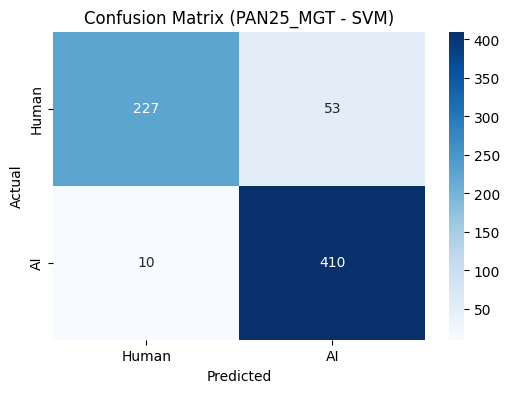

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       280
           1       0.86      0.99      0.92       420

    accuracy                           0.90       700
   macro avg       0.92      0.87      0.89       700
weighted avg       0.91      0.90      0.89       700



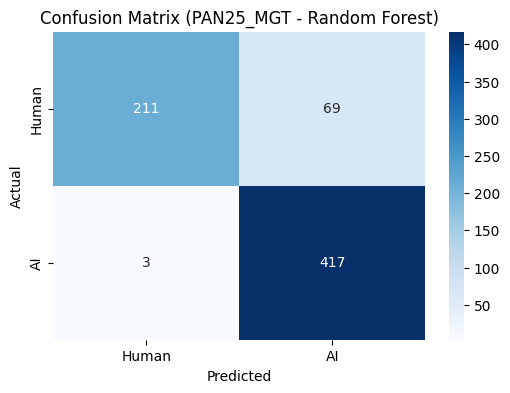

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       280
           1       0.90      0.97      0.94       420

    accuracy                           0.92       700
   macro avg       0.93      0.91      0.92       700
weighted avg       0.93      0.92      0.92       700



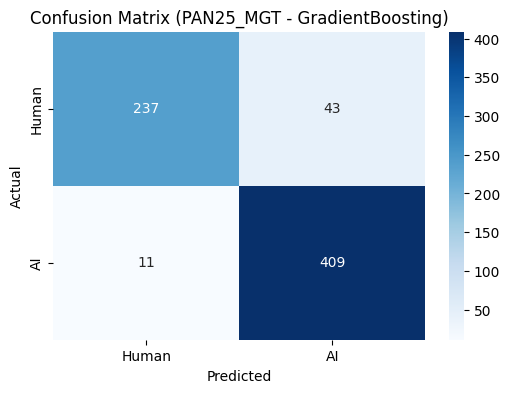

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_pan)
    # y_proba = model.predict_proba(X_pan)[:, 1]

    print(f"Evaluation of model {model_name}")
    # roc_auc = roc_auc_score(y, y_proba)
    # print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (PAN25_MGT - {model_name})')
    plt.show()